In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
churn = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/telecom_churn_clean.csv")
churn.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


K NEAREST NEIGHBOR

k-Nearest Neighbors: Fit
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The target, "churn", needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.

"account_length" and "customer_service_calls" are treated as features because account length indicates customer loyalty, and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn.


k-Nearest Neighbors: Fit & Predict

In [71]:
#1. Import KNeighborsClassifier from sklearn.neighbors.

from sklearn.neighbors import KNeighborsClassifier
X = churn[['account_length','customer_service_calls']].values
y= churn['churn'].values
print(X.shape, y.shape)


(3333, 2) (3333,)


In [72]:
#2. Instantiate a KNeighborsClassifier called knn with 6 neighbors.
knn = KNeighborsClassifier(n_neighbors = 6)

#3. Fit the classifier to the data using the .fit() method.
knn.fit(X,y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

#4. Create y_pred by predicting the target values of the unseen features X_new using the knn model.

y_pred = knn.predict(X_new)

#5. Print the predicted labels for the set of predictions.

print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


Train/test split + computing accuracy

In [73]:
#1. Import train_test_split from sklearn.model_selection.

from sklearn.model_selection import train_test_split

X_2 = churn.drop('churn', axis=1).values
y_2 = churn['churn'].values


#2. Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size = 0.2, random_state = 42, stratify = y)

knn = KNeighborsClassifier(n_neighbors = 5)

#3. Fit the knn model to the training data. Compute and print the model's accuracy for the test data.
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))



0.8545727136431784


Overfitting And Underfitting

Interpreting model complexity is a great way to evaluate supervised learning performance. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

In [74]:
#1. Create neighbors as a numpy array of values from 1 up to and including 12.
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}


#2. Instantiate a KNeighborsClassifier, with the number of neighbors equal to the neighbor iterator.
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)

#3. Fit the model to the training data.
    knn.fit(X_train, y_train)

#4. Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the train_accuracies and test_accuracies dictionaries, respectively, utilizing the neighbor iterator as the index.

    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


print(neighbors, '\n', train_accuracies, '\n', test_accuracies)



[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


Visualizing model complexity

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

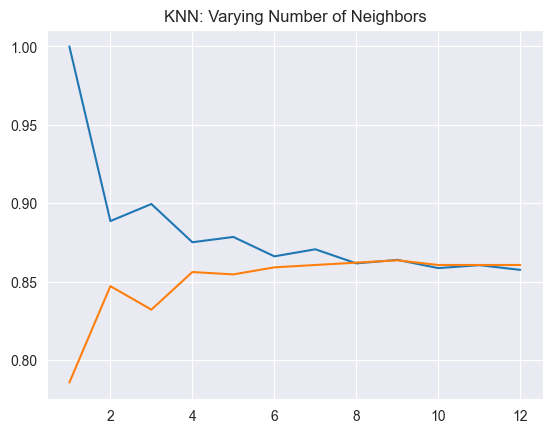

In [75]:
#1. Add a title "KNN: Varying Number of Neighbors".
plt.title("KNN: Varying Number of Neighbors")

#2. Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')

#3. Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')

plt.show()

REGRESSION

Creating features





In this chapter, you will work with a dataset called sales, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign.

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [76]:
sales = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/advertising_and_sales_clean.csv")
print(sales.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [82]:
#1. Create X_sal, an array of the values from the sales_df DataFrame's "radio" column.
X_sal = sales['radio'].values

#2. Create y_sal, an array of the values from the sales_df DataFrame's "sales" column.
y_sal = sales['sales'].values

#3. Reshape X into a two-dimensional NumPy array.
X_sal = X_sal.reshape(-1,1)

#4. Print the shape of X and y.
print(X_sal.shape)

(4546, 1)


Building a linear regression model




Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [84]:
#1. Import LinearRegression.
from sklearn.linear_model import LinearRegression

X_sal.reshape(-1,1)

#2. Instantiate a linear regression model.
reg = LinearRegression()
reg.fit(X_sal, y_sal)

#3. Predict sales values using X-sal, storing as predictions.
predictions = reg.predict(X_sal)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]
